## Modelo SERID

+ **S**usceptible
+ **E**xposed
+ **I**nfectious
+ **R**ecovered
+ **D**ead


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [23]:
def ode_model(z, t, beta, sigma, gamma, mu):
    S, E, I, R, D = z
    N = S + E + I + R + D
    dSdt = -beta*S*I/N
    dEdt = beta*S*I/N - sigma*E
    dIdt = sigma*E - gamma*I - mu*I
    dRdt = gamma*I
    dDdt = mu*I
    return [dSdt, dEdt, dIdt, dRdt, dDdt]
    
def ode_solver(t, initial_conditions, params):
    initE, initI, initR, initN, initD = initial_conditions
    beta, sigma, gamma, mu = params
    initS = initN - (initE + initI + initR + initD)
    res = odeint(ode_model, [initS, initE, initI, initR, initD], t, args=(beta, sigma, gamma, mu))
    return res

In [24]:
initN = 9616621
# S0 = 966000000
initE = 5
initI = 2
initR = 0
initD = 0
sigma = 1/5.2
gamma = 1/2.9
mu = 0.034
R0 = 4
beta = R0 * gamma
days = 180

In [25]:
initial_conditions = [initE, initI, initR, initN, initD]
params = [beta, sigma, gamma, mu]
# tspan = np.arange(0, days, 1)
tspan = np.linspace(0,160,160)
sol = ode_solver(tspan, initial_conditions, params)
S, E, I, R, D = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3], sol[:, 4]

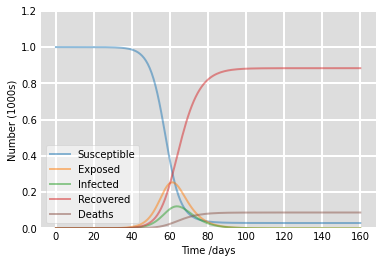

In [26]:
fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor = '#dddddd', axisbelow = True)

ax.plot(tspan, S/initN, '#1f77b4', alpha = 0.5, lw = 2, label = 'Susceptible')
ax.plot(tspan, E/initN, '#ff7f0e', alpha = 0.5, lw = 2, label = 'Exposed')
ax.plot(tspan, I/initN, '#2ca02c', alpha = 0.5, lw = 2, label = 'Infected')
ax.plot(tspan, R/initN, '#d62728', alpha = 0.5, lw = 2, label = 'Recovered')
ax.plot(tspan, D/initN, '#8c564b', alpha = 0.5, lw = 2, label = 'Deaths')


ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
ax.grid(b = True, which = 'major', c = 'w', lw = 2, ls = '-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
  ax.spines[spine].set_visible(False)
# plt.savefig('sir.pdf')
plt.show()


## Referências Bibliograficas

1. **Pernambuco | Cidades e Estados** | IBGE. Ibge.gov.br. Disponível em: <https://www.ibge.gov.br/cidades-e-estados/pe.html>.
1. **Dois primeiros casos do novo coronavírus são confirmados em PE, diz Secretaria de Saúde.** G1. Disponível em: <https://g1.globo.com/pe/pernambuco/noticia/2020/03/12/primeiros-casos-de-coronavirus-sao-confirmados-pela-secretaria-de-saude-de-pernambuco.ghtml>.

‌
‌